# TP1 : Génération de variables discrètes, Représentation graphique d'un échantillon

## 1. Introduction aux Notebooks Jupyter

Jupyter Notebook est un ensemble de modules Python permettant notamment
de mêler des blocs de texte rédigés en Markdown, comme celui-ci,
et des blocs de code Python comme celui ci-après.

Les TP présupposent une connaissance au moins élémentaire du langage Python, [de nombreux sites internet existent](https://www.pythoncheatsheet.org/cheatsheet/basics) pour vous rafraichir les idées à ce sujet.

In [1]:
### BLOC 1 ###

message='Bonjour.\n'

def hello_world():
    return "Hello World !"

In [2]:
### BLOC 2 ###

print(message)
print(hello_world())

Bonjour.

Hello World !


Il est même possible d'exécuter les blocs de code dans le désordre. Essayons donc d'exécuter le bloc 3 puis le bloc 2 pour voir.

In [3]:
### BLOC 3 ###

message='Rebonjour !\n'

def hello_world():
    return "Le TP progresse."

Il est également possible de déplacer des blocs existants ou d'en insérer de nouveaux. Les notebooks sont un outil assez souple, notamment adapté pour partager et illustrer des phénomènes mathématiques, aléatoires ou non, ce que nous allons faire au cours des prochaines séances.

Le but de cette première séance de TP est de se familiariser avec cet outil, et notamment avec l'utilisation des bibliothèques graphiques de Python.

## 2. Affichage d'une courbe de fonction

Pour l'affichage d'une courbe du type $Y=f(X)$, on utilise les modules `numpy`, spécialisée dans la manipulation de listes / vecteurs / matrices, et `matplotlib.pyplot`, pour l'affichage lui-même. Plus de détails sur l'utilisation du module Pyplot sont disponibles dans [la documentation](https://matplotlib.org/stable/tutorials/introductory/pyplot.html).

In [4]:
import numpy as np
import matplotlib.pyplot as plt

X2 = np.arange(0,10,0.1)

In [5]:
# Pour l'exemple, utilisons la fonction identité :

def f2(x): return x

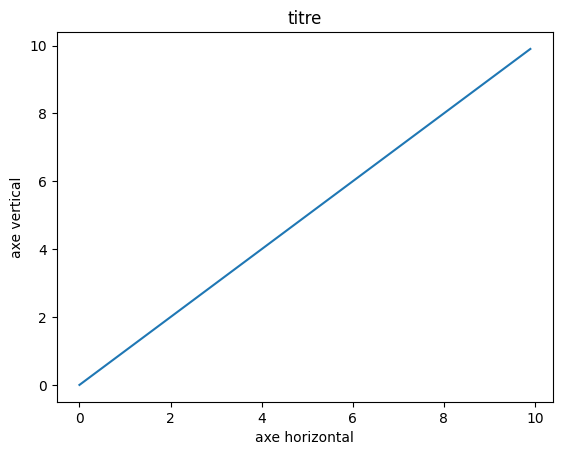

In [6]:
### AFFICHAGE DE LA FONCTION ###

Y2 = f2(X2)

plt.title("titre")
plt.xlabel("axe horizontal")
plt.ylabel("axe vertical")
plt.plot(X2,Y2)
plt.show()

Ce faisant, `matplotlib` génère une image qui est affichée par le notebook. On peut ceci dit faire un peu plus interactif, en faisant appel (une fois suffit) à une commande *magique*. Magique est ici un terme technique, pas une façon de parler, mais celà dépasse le cadre de ce TP.

Exécutons donc la commande suivante puis à nouveau le bloc d'affichage de la fonction.

In [7]:
%matplotlib notebook

On peut désormais changer le format d'affichage, se déplacer au sein du graphe, et zoomer / recarder jusqu'à manuellement isoler une zone d'intérêt à exporter.

Avec ce mode, il faut penser à « éteindre » un bloc graphique avant de générer le suivant. Pour revenir au mode simplifié, il suffit d'exécuter l'instruction suivante :

In [8]:
%matplotlib inline

## 3. Génération d'entiers aléatoires avec le module `random`

Python dispose d'un module interne dédié à la génération de données aléatoires, `random`. Faisons un petit récapitulatif des fonctions les plus utiles du module (plus d'informations dans [la documentation](https://docs.python.org/3/library/random.html)).

In [9]:
import random as rand

Commençons par la fonction `randint(a,b)` qui retourne uniformément au hasard un entier $n\in \left[a,b\right]$.

In [10]:
rand.randint(0,10)

1

En particulier, `rand.randint(0,1)` génère une variable de Bernouilli équilibrée, de loi $\mathcal{B}(0.5)$.

On peut également utiliser `randrange(a,b,s)`, qui retourne un élément choisi uniformément au hasard dans la liste définie par `randrange(a,b,s)`, autrement dit $[a,b[\cap\left(a+s\mathbb{N}\right)$.

In [11]:
rand.randrange(0,10,3)

0

**Exercice :**

Compléter le code suivant pour que la fonction `echantillon(n)` retourne une liste de `L` de longueur $n$, constituée de tirages indépendants de loi $\mathcal{B}(0.5)$.

In [12]:
def echantillon3(n):
    # Code à remplir    
    return L

In [13]:
### Correction indicative ###

def echantillon3(n):
    L = [rand.randint(0,1) for i in range(n)]    
    return L

## 4. Génération d'entiers aléatoires avec le module `numpy.random`

Dans la partie précédente, on a facilement pu modéliser des variables aléatoires à valeurs dans un ensemble *fini*. Malheureusement, cette approche est assez inadaptée pour des variables à valeurs dans un ensemble *dénombrable*, ce qui est en particulier le cas des loins de Poisson. Pour ce faire, le module `numpy` par exemple dispose de son propre sous-module  `numpy.random` dédié à la génération de variables aléatoires (une liste exhaustive des lois de probabilité utilisables est dans [la documentation](https://numpy.org/doc/stable/reference/random/generator.html#distributions)).

On peut par exemple faire appel à une loi binomiale $\mathcal{B}(n,p)$ avec `np.random.binomial(n,p)` :

In [14]:
np.random.binomial(10,.3)

2

On peut également directement générer un échantillon de $k$ tirages indépendants avec `np.random.binomial(n,p,k)`, sous la forme d'un tableau numpy :

In [15]:
np.random.binomial(10,.5,20)

array([5, 2, 6, 2, 4, 5, 3, 2, 5, 4, 5, 5, 5, 7, 5, 4, 5, 5, 5, 6])

On peut de même générer une loi géométrique $\mathcal{G}(p)$ via  `np.random.geometric(p)`, une loi de Poisson $\mathcal{P}(s)$ via `np.random.poisson(s)`, ou une loi de Zipf de paramètre $a\in\mathbb{R}_{> 1}$ via `np.random.zipf(a)` (sur laquelle on reviendra peut-être au TP3).

## 5. Représentation graphique d'une loi discrète

Pour représenter graphiquement la loi d'une variable discrète, il peut être pertinent d'utiliser des *diagrammes en bâtons* plus spécifiquement.

Considérons ainsi la fonction `binom(n,p,k)`, qui calcule $\mathbb{P}(X=k)$ pour une variable binômiale $X\sim\mathcal{B}(n,p)$.

In [16]:
from math import comb
# comb(n,k) retourne le coefficient binômial « k parmi n ».

def binom(n,p,k):
    if k <= n and k >= 0 :
        return comb(n,k)*p**k*(1-p)**(n-k)
    else:
        return 0

On sait qu'une telle variable prend des valeurs entre $0$ et $n$. On peut alors afficher sa distribution via le diagramme en bâtons (*bar plot* en anglais) suivant.

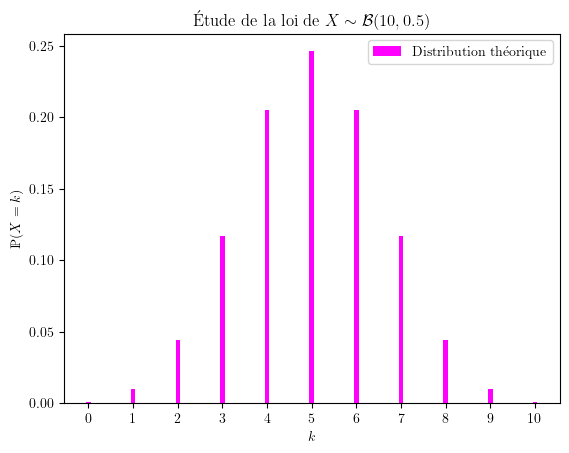

In [17]:
n5 = 10
p5 = .5

X5 = np.arange(n5+1)
P5 = [binom(n5,p5,k) for k in X5]

# Permet d'afficher des formules mathématiques en légende
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Computer Modern'
plt.rcParams['text.latex.preamble'] = r'\usepackage{dsfont}'

width5 = 0.1
plt.xticks(X5)
plt.xlabel('$k$')
plt.ylabel('$\mathds{P}(X=k)$')
plt.title('Étude de la loi de $X\sim\mathcal{B}('+str(n5)+','+str(p5)+')$')
plt.bar(X5,P5,width5,color='magenta',label='Distribution théorique')
plt.legend()
plt.show()

Dans le cas de variables aléatoires à valeurs non-numériques, on peut également utiliser une liste de mots pour l'axe horizontal.

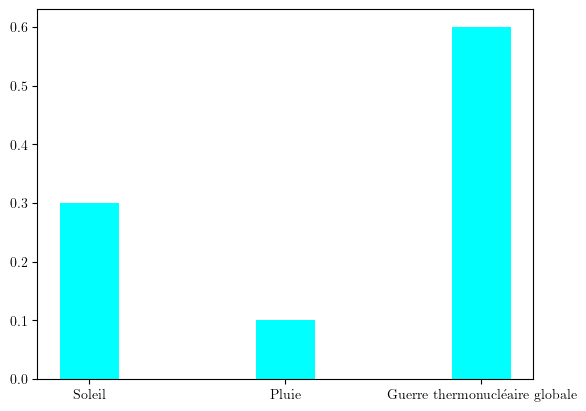

In [18]:
A5 = ['Soleil','Pluie','Guerre thermonucléaire globale']
B5 = [0.3,0.1,0.6]
plt.bar(A5,B5,width=0.3,color='cyan')
plt.show()

**Exercice :**

On aimerait comparer cette distribution théorique `P` à la distribution empirique observée sur un échantillon aléatoire, qu'on va écrire dans une liste `Q`.

Ainsi, si on considère un échantillon de taille $10$,
et qu'on observe $5$ fois l'entier $3$ dans cet échantillon,
on veut avoir `Q[3]=0.5`.

Après avoir généré cette densité empirique `Q` à l'intérieur de la fonction `echantillon5(n,p,taille)` dans le bloc 1, représentez son diagramme sur le même graphe que celui de `P`, côte à côte, dans le bloc 2.

In [19]:
### BLOC 1 ###

def echantillon5(n,p,taille):
    # Code à remplir
    return Q

In [20]:
### Correction indicative ###

def echantillon5(n,p,taille):
    Sample = np.random.binomial(n,p,taille)
    Q = np.zeros(n+1)
    for x in Sample:
        Q[x]+=1
    Q /= taille
    return Q

<details>
<summary><b>Cliquer ici pour un indice sur l'affichage graphique.</b></summary>

Dans le diagramme précédent, l'instruction `plt.bar(X,P)` dit d'afficher la $k$-ième barre, de hauteur `P[k]`, à la position `X[k]`.
Ainsi, en utilisant à la place l'instruction `plt.bar(X+width/2,P)`, on décalera les barres légèrement sur la droite.
En décalant de même les barres pour `Q` sur la gauche via `plt.bar(X-width/2,Q)`, on peut alors juxtaposer les deux diagrammes sans perte de lisibilité.
</details>

In [21]:
### BLOC 2 ###

taille5 = 1000
Q5 = echantillon5(n5,p5,taille5)

# À vous de jouer !

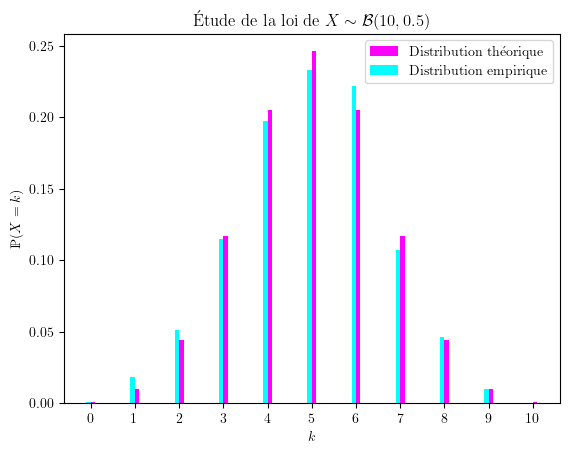

In [22]:
### Correction indicative ###

width = 0.1
plt.xticks(X5)
plt.xlabel('$k$')
plt.ylabel('$\mathds{P}(X=k)$')
plt.title('Étude de la loi de $X\sim\mathcal{B}('+str(n5)+','+str(p5)+')$')
plt.bar(X5+width/2,P5,width,color='magenta',label='Distribution théorique')
plt.bar(X5-width/2,Q5,width,color='cyan',label='Distribution empirique')
plt.legend()
plt.show()

**Exercice :**

Pour rappel, la *fonction de répartition* d'une variable réelle $X$ est
la fonction croissante $f:x\mapsto \mathbb{P}(X\leq x)$.
Dans le cas d'une variable à espace d'états fini, cette fonction est constante par morceaux, et on peut la représenter comme une famille finie de segments horizontaux.

On se propose ici de représenter la fonction de répartition de la loi binômiale.

<details>
<summary><b>Cliquer ici pour un indice sur l'affichage graphique.</b></summary>

Comme mentionné dans l'énoncé, on veut représenter une famille finie de segments.
On commence par fixer $x_0<x_1$ et $x_{n+1}>x_n$ les bornes de la fenêtre d'affichage.
On peut stocker ces $n+2$ réels dans une liste `X`,
et définir une liste `Y` de longueur $n+1$ telle que `Y[i]` soit égale à $y_i:=\mathbb{P}\left(X\leq x_i\right)$.
Pour $i\in\{ 0,1,\dots,n \}$, on veut alors afficher le segment $\left[ \left(x_i,y_i\right),\left(x_{i+1},y_i\right)\right[$. On peut faire ceci en utilisant le code suivant :
    
```python
plt.scatter([X[i]],[Y[i]],marker='o',color='r')
plt.plot((X[i],X[i+1]),(Y[i],Y[i]),color='r')
```
</details>

In [23]:
# À vous de jouer !

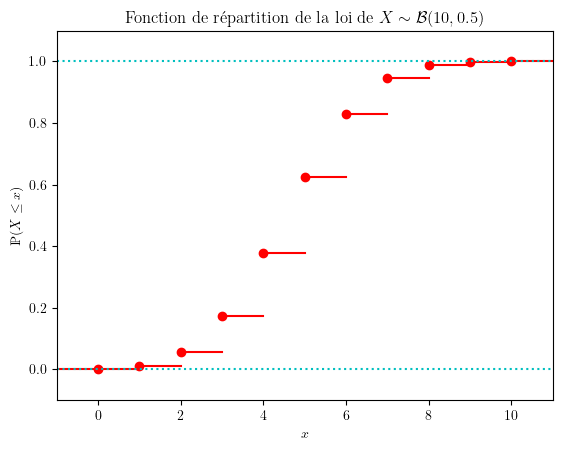

In [24]:
### Correction indicative ###

XX = range(-1,n5+2)
YY = [0]

# On crée les probabilités cumulées en sommant sur la distribution P déjà calculée.

for x in P5:
    YY.append(YY[-1]+x)

# On affiche itérativement les segments.

plt.plot((XX[0],XX[1]),(YY[0],YY[0]),color='r')

for i in range(1,n5+2):
    plt.scatter([XX[i]],[YY[i]],marker='o',color='r')
    plt.plot((XX[i],XX[i+1]),(YY[i],YY[i]),color='r')

plt.xlim(-1,n5+1)
plt.ylim(-0.1,1.1)

plt.plot([-1,n5+1],[0,0],color='c',linestyle='dotted')
plt.plot([-1,n5+1],[1,1],color='c',linestyle='dotted')

plt.xlabel('$x$')
plt.ylabel('$\mathds{P}(X\leq x)$')
plt.title('Fonction de répartition de la loi de $X\sim\mathcal{B}('+str(n5)+','+str(p5)+')$')
plt.show()

## 6. Somme de variables de Poisson indépendantes

Désormais enrichi par tous ces exemples, votre mission (que vous l'acceptiez ou non) est de comparer la distribution empirique d'une somme de deux lois de Poisson $\mathcal{P}(a)$ et $\mathcal{P}(b)$ indépendantes à la distribution théorique attendue $\mathcal{P}(a+b)$.

Cette comparaison se fera sous forme de diagrammes en bâtons. Étant donné que la distribution théorique est à valeurs dans $\mathbb{N}$ tout entier, on pourra se restreindre aux $20$ premières valeurs par exemple, avec $a=2$ et $b=3$ par exemple.

In [25]:
# À vous de jouer !

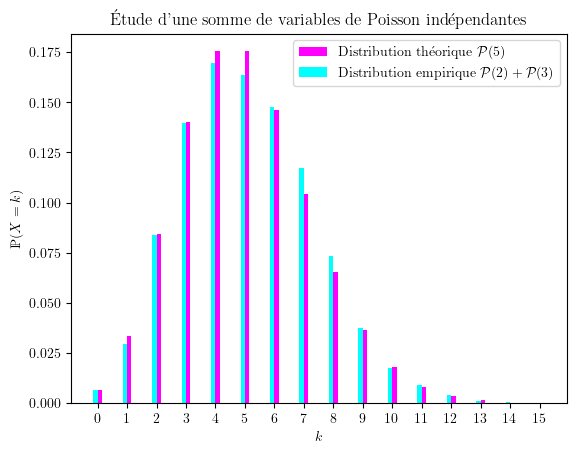

In [26]:
### Correction indicative ###

a6 = 2
b6 = 3

sample6 = 3000

horizon6 = 15

from math import factorial, exp

def poisson(lam, k): return exp(-lam)*lam**k/factorial(k)

X6 = np.arange(horizon6+1)
Y6 = [poisson(a6+b6,x) for x in X6]

P6 = np.random.poisson(a6,sample6)+np.random.poisson(b6,sample6)
Q6 = np.zeros(horizon6+1)
for p in P6:
    if p <= horizon6:
        Q6[p]+=1
Q6/=sample6

width = 0.15
plt.xticks(X6)
plt.xlabel('$k$')
plt.ylabel('$\mathds{P}(X=k)$')
plt.title('''Étude d'une somme de variables de Poisson indépendantes''')
plt.bar(X6+width/2,Y6,width,color='magenta',label='Distribution théorique $\mathcal{P}('+str(a6+b6)+')$')
plt.bar(X6-width/2,Q6,width,color='cyan',label='Distribution empirique $\mathcal{P}('+str(a6)+')+\mathcal{P}('+str(b6)+')$')
plt.legend()
plt.show()

## 7. Bonus : génération de variables discrètes quelconques (hors programme)

Il peut être parfois intéressant de générer une variable aléatoire avec une loi particulière. Considérons ainsi une variable $X$ à valeurs dans $\mathbb{N}$ telle que $\mathbb{P}(X=k)$ soit égal à la valeur `P[k]` de la liste `P`.

In [27]:
P7=[0,0,1/36,2/36,3/36,4/36,5/36,6/36,5/36,4/36,3/36,2/36,1/36]

Quel phénomène aléatoire est modélisé par la loi ci-avant ?

<details>
<summary><b>Cliquer ici pour afficher la réponse.</b></summary>

Ici, $X$ est la loi de la somme de deux dés à 6 faces indépendants.
</details>

In [28]:
sum(P7)

1.0000000000000002

Il faut en théorie que `sum(P)` soit égal à $1$, mais on constate le cumul d'erreurs numériques. Pour contourner ce souci, il faut en pratique prévoir assez de décimales pour que ce terme d'erreur numérique soit négligeable (ce qui est le cas ici), ou bien utiliser des méthodes plus avancées comme le stockage de couples d'entiers $(p,q)$ pour encoder sans erreur les rationnels $\frac{p}{q}$.

La fonction `random()` retourne un nombre *réel* $U$ uniformément choisi dans $[0,1]$. En particulier, pour tous $0\leq a\leq b\leq 1$, on a $\mathbb{P}(a\leq U\leq b)=b-a$. Étant donné un tel tableau `P`, en utilisant le théorème de transfert sur la variable $U$, on peut générer un tirage aléatoire de $X$ comme suit :

In [29]:
def random_sample(P):
    u = rand.random()
    x=0
    
    while P[x] < u :
        u -= P[x]
        x += 1
    return x

En particulier, `P=[1-p,p]` permet de générer une variable suivant une loi de Bernoulli $\mathcal{B}(p)$.

In [30]:
random_sample(P7)

6

$\mathcal{FIN}$